## CASK FR1 Correct Rate

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
from accuracy import graph_cumulative_acc, read_and_record, graph_group_stats
from intervals import perform_T_test
from path import fr1_ctrl_path, fr1_cask_path, fr1_ctrl_sheets, fr1_cask_sheets
from path import fr1_ctrl_cohorts, fr1_cask_cohorts
print(f'There are {len(fr1_ctrl_cohorts)} cohorts in control and {len(fr1_cask_cohorts)} in CASK')

export_root = '../export/Figure 2/CASK_FR1_accuracy'
os.makedirs(export_root, exist_ok=True)
ctrl_ending_corr = []
cask_ending_corr = []
ctrl_learned_time = []
cask_learned_time = []
ctrl_acc_dict = {}
cask_acc_dict = {}

There are 4 cohorts in control and 4 in CASK


## Control Group

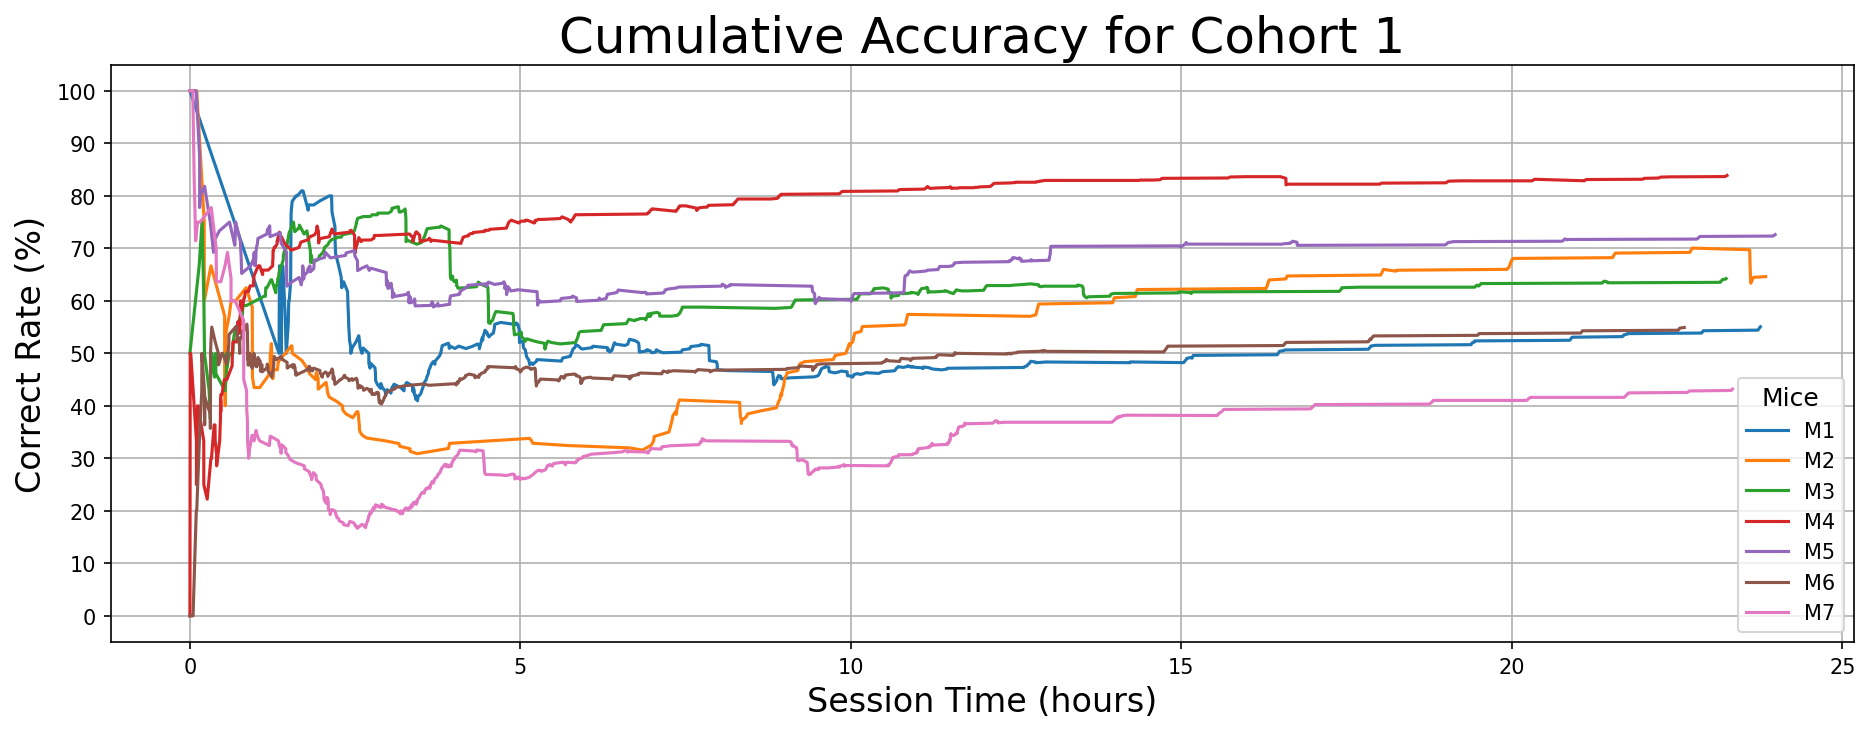

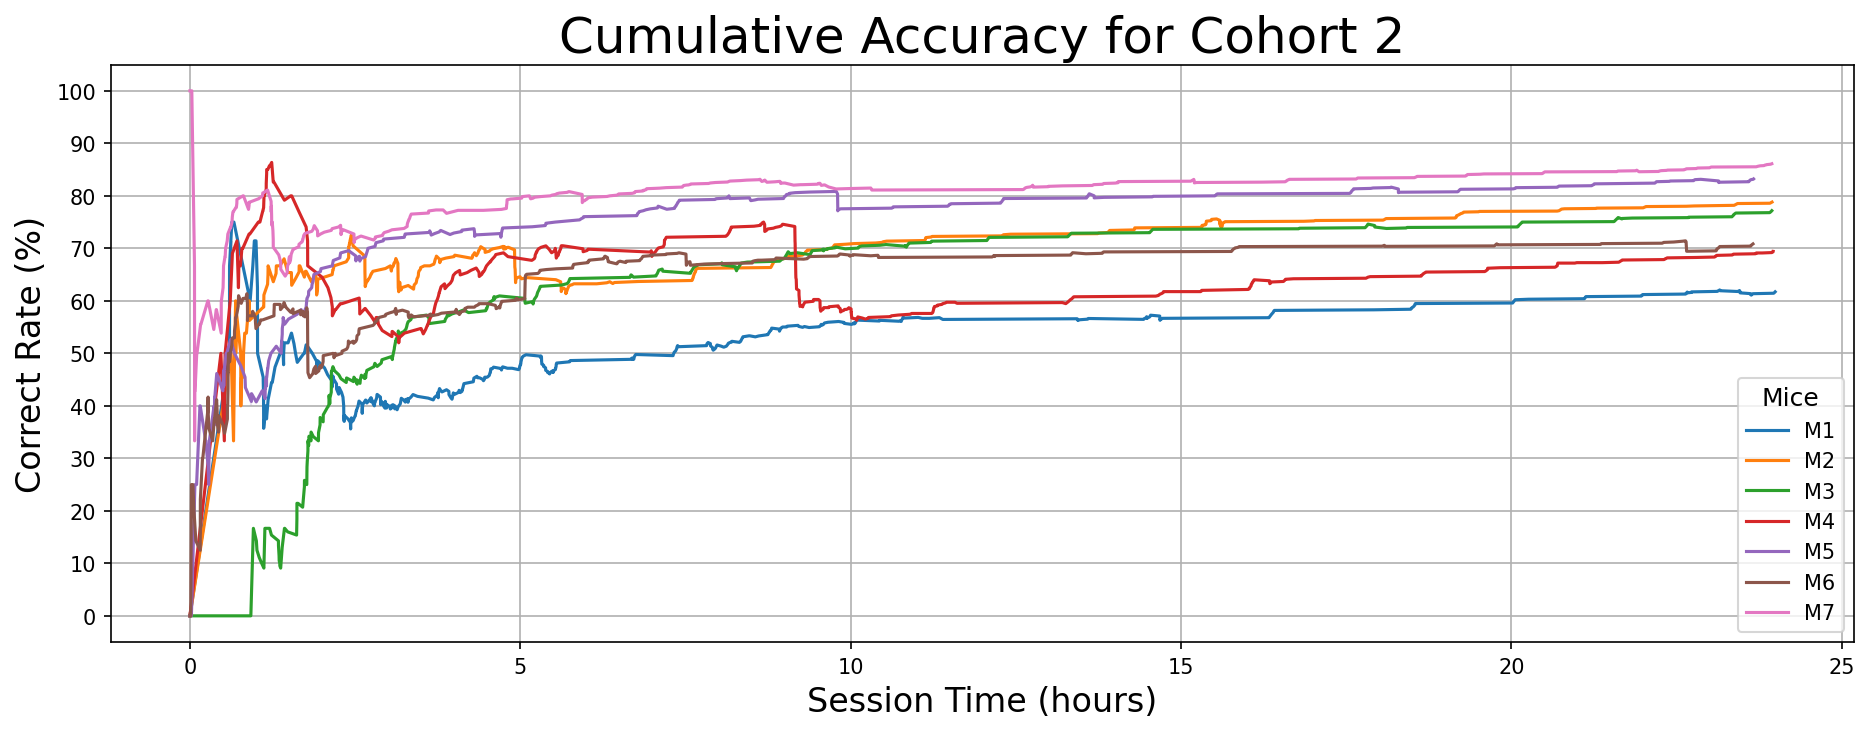

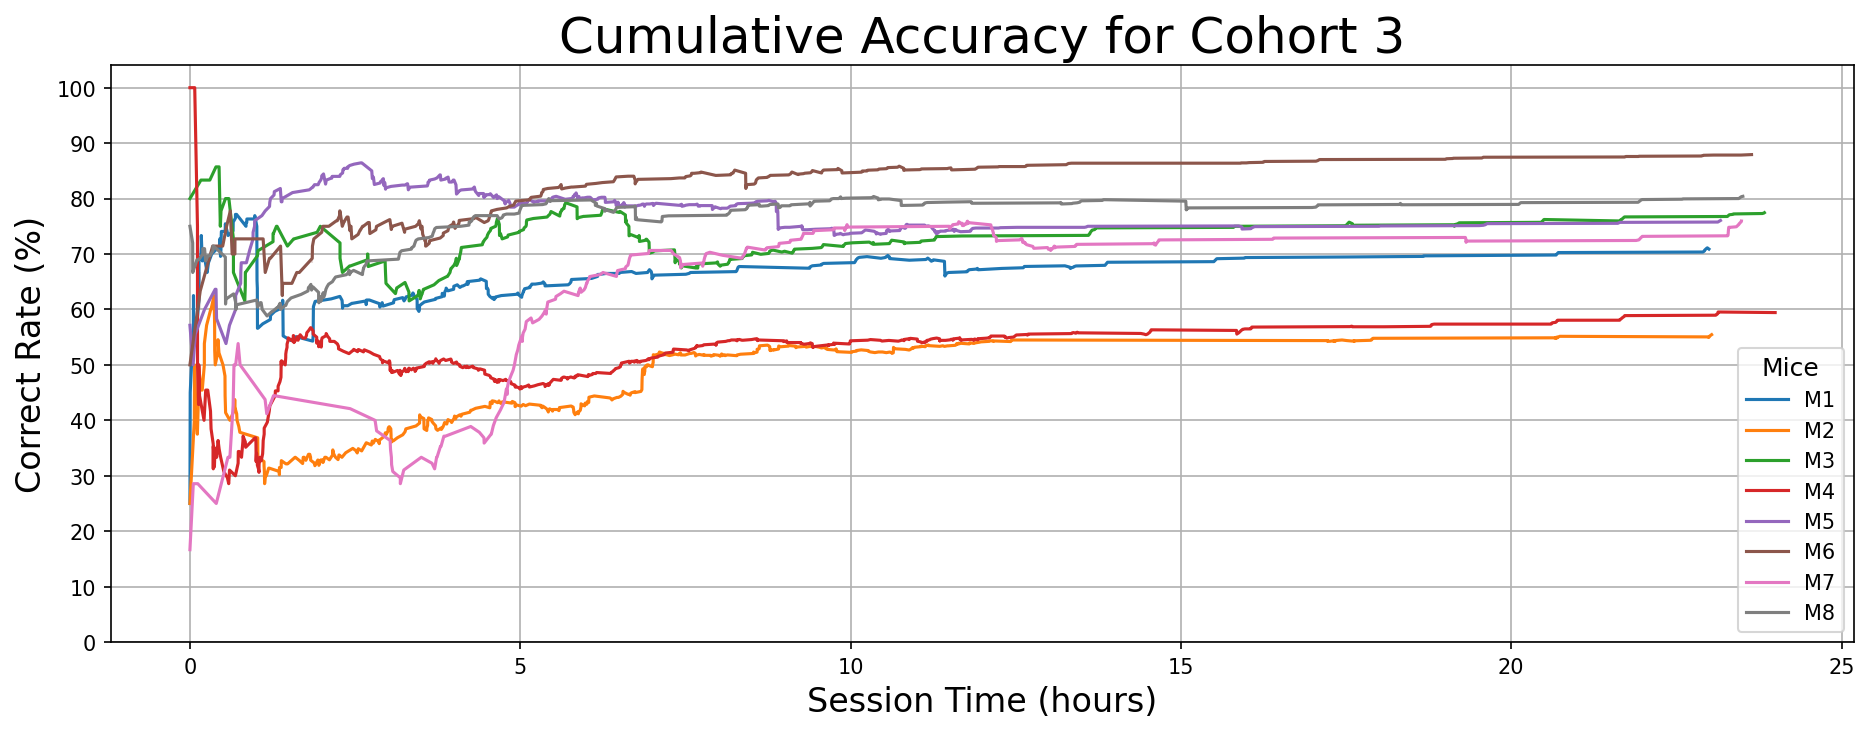

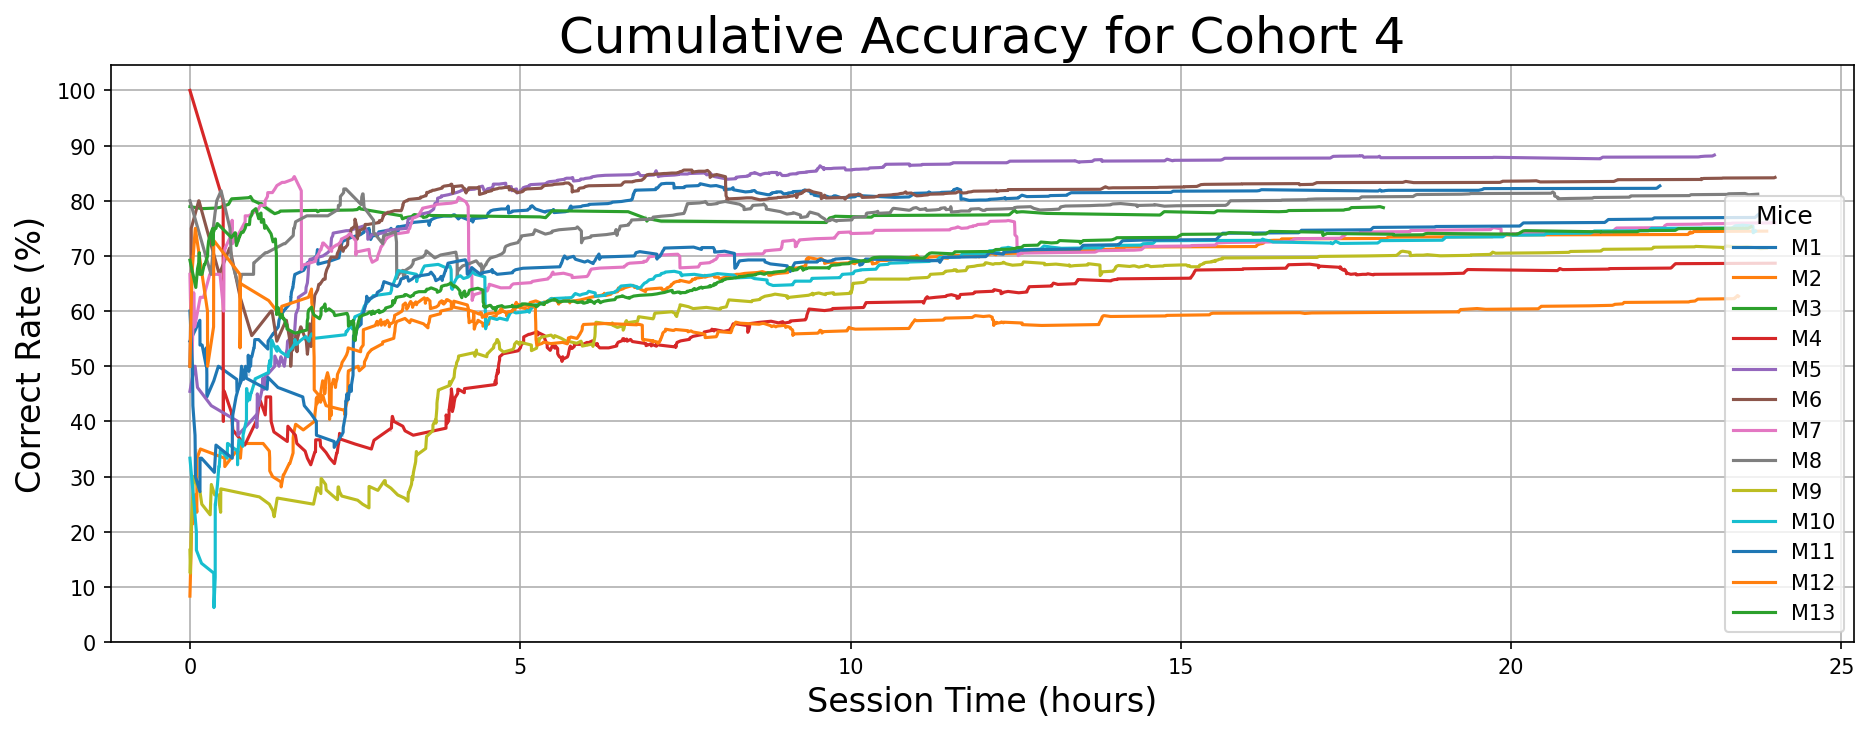

In [2]:
group_data = []

for idx, cohort in enumerate(fr1_ctrl_cohorts):
    for sheet in cohort:
        data = read_and_record(path=fr1_ctrl_path, sheet=sheet, 
                            ending_corr=ctrl_ending_corr, 
                            learned_time=ctrl_learned_time,
                            acc_dict=ctrl_acc_dict)
        group_data.append(data)
    graph_cumulative_acc(group_data, idx+1, export_path=os.path.join(export_root, f'ctrl_cohort_{idx+1}.svg'))
    group_data = []

## CASK Group

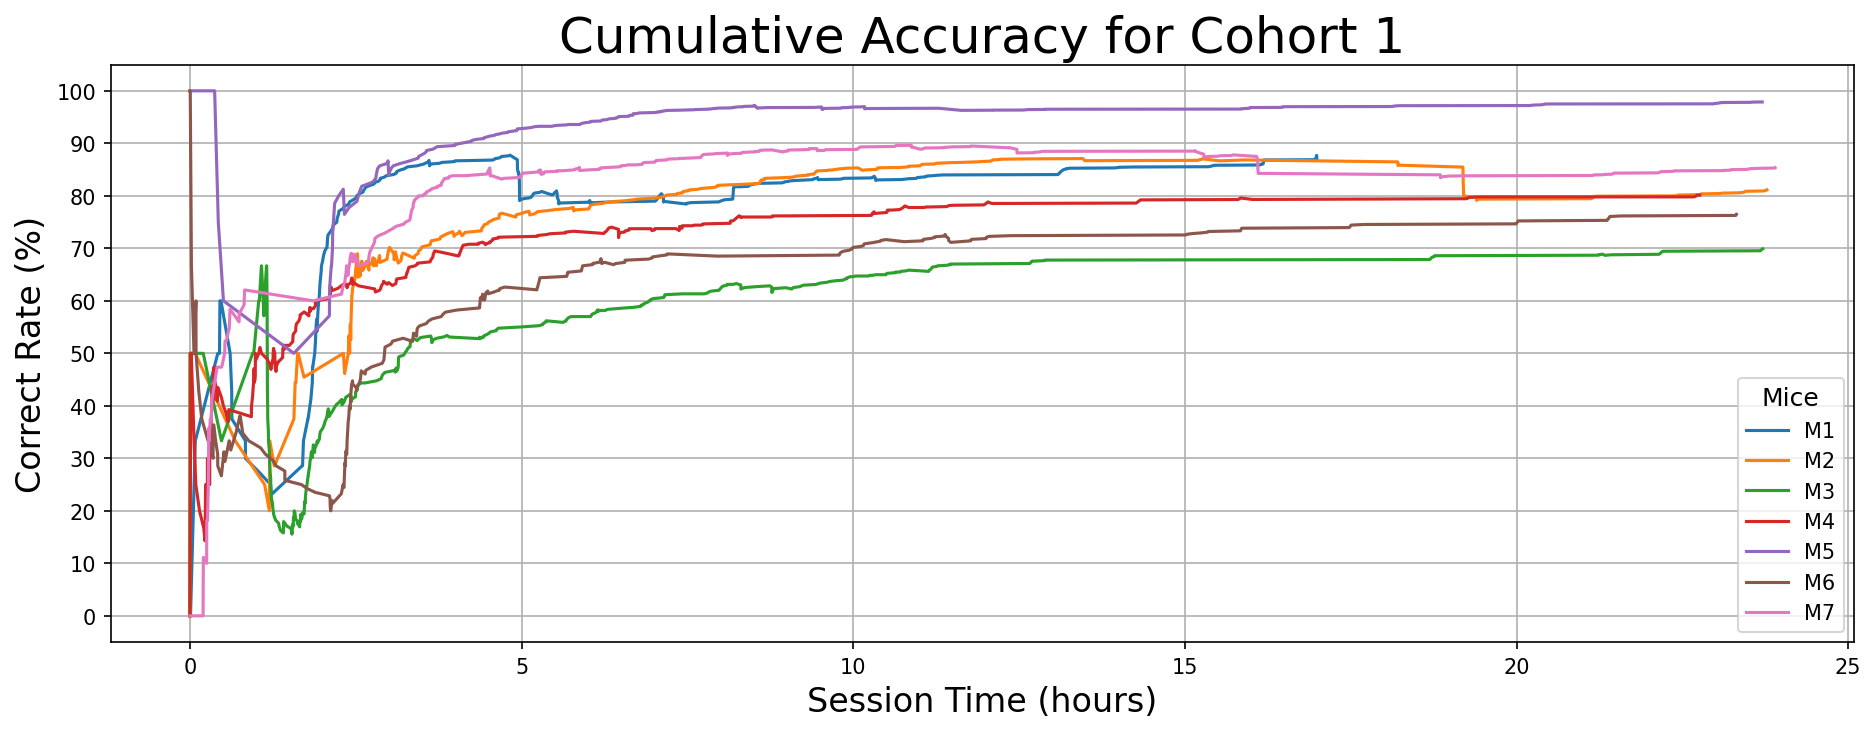

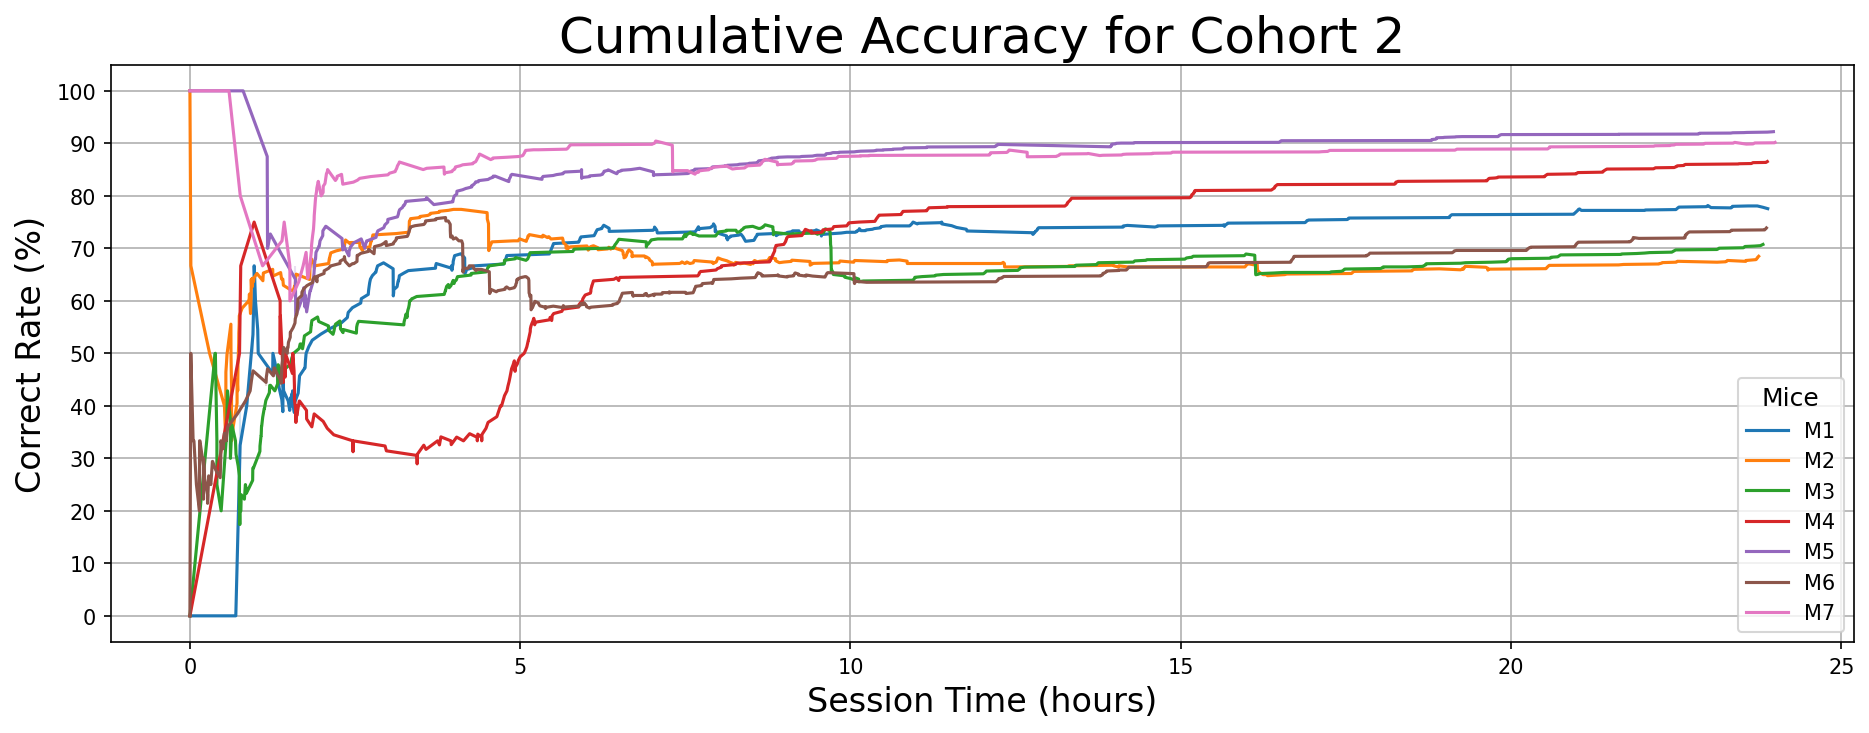

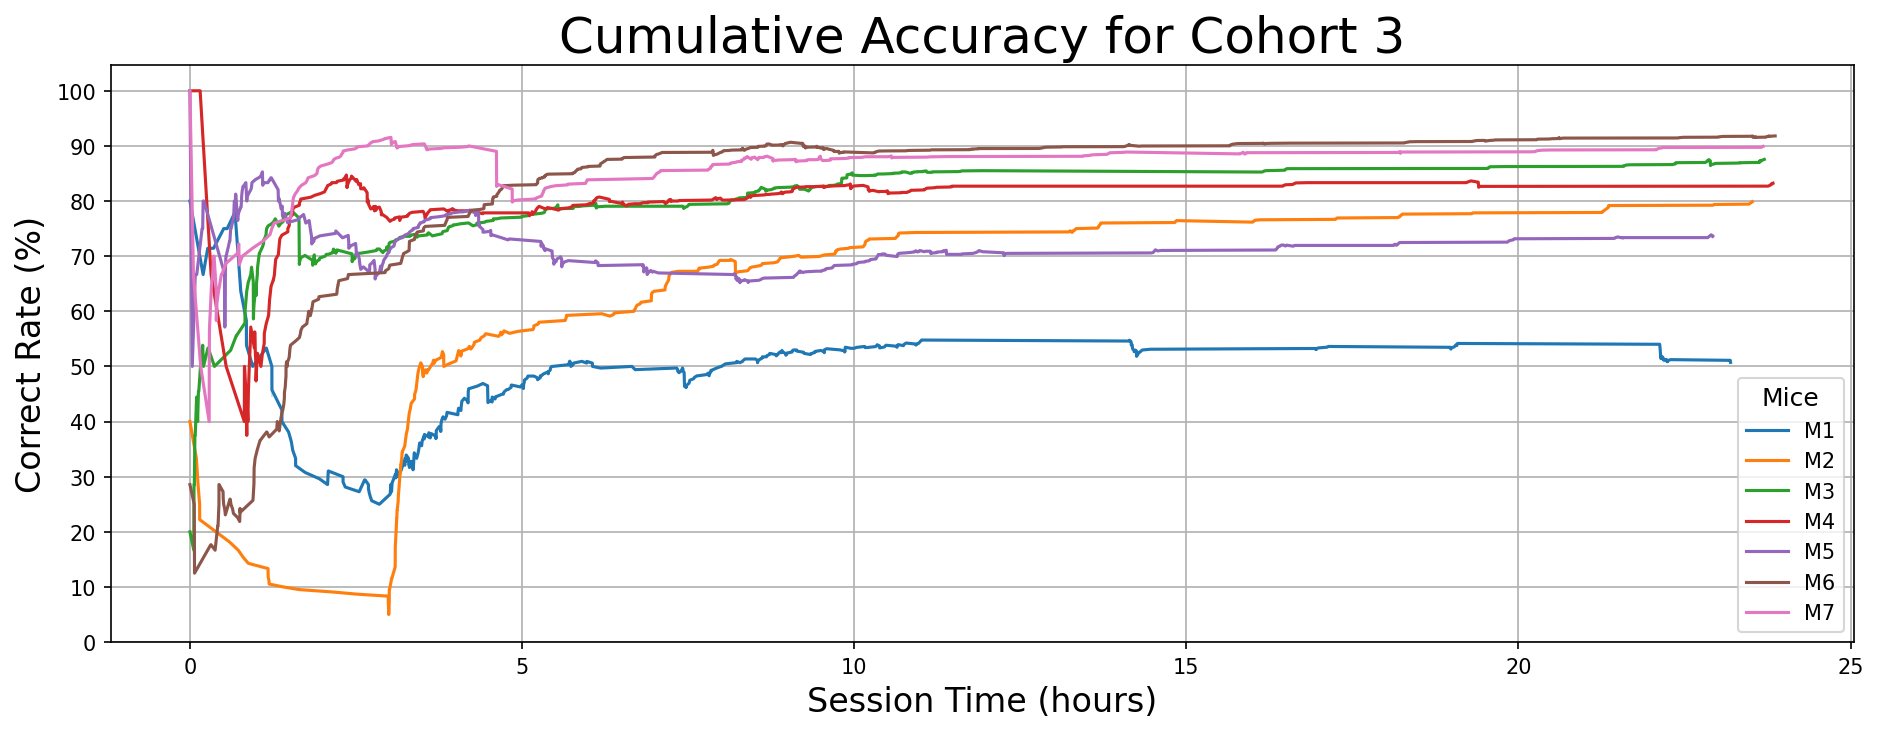

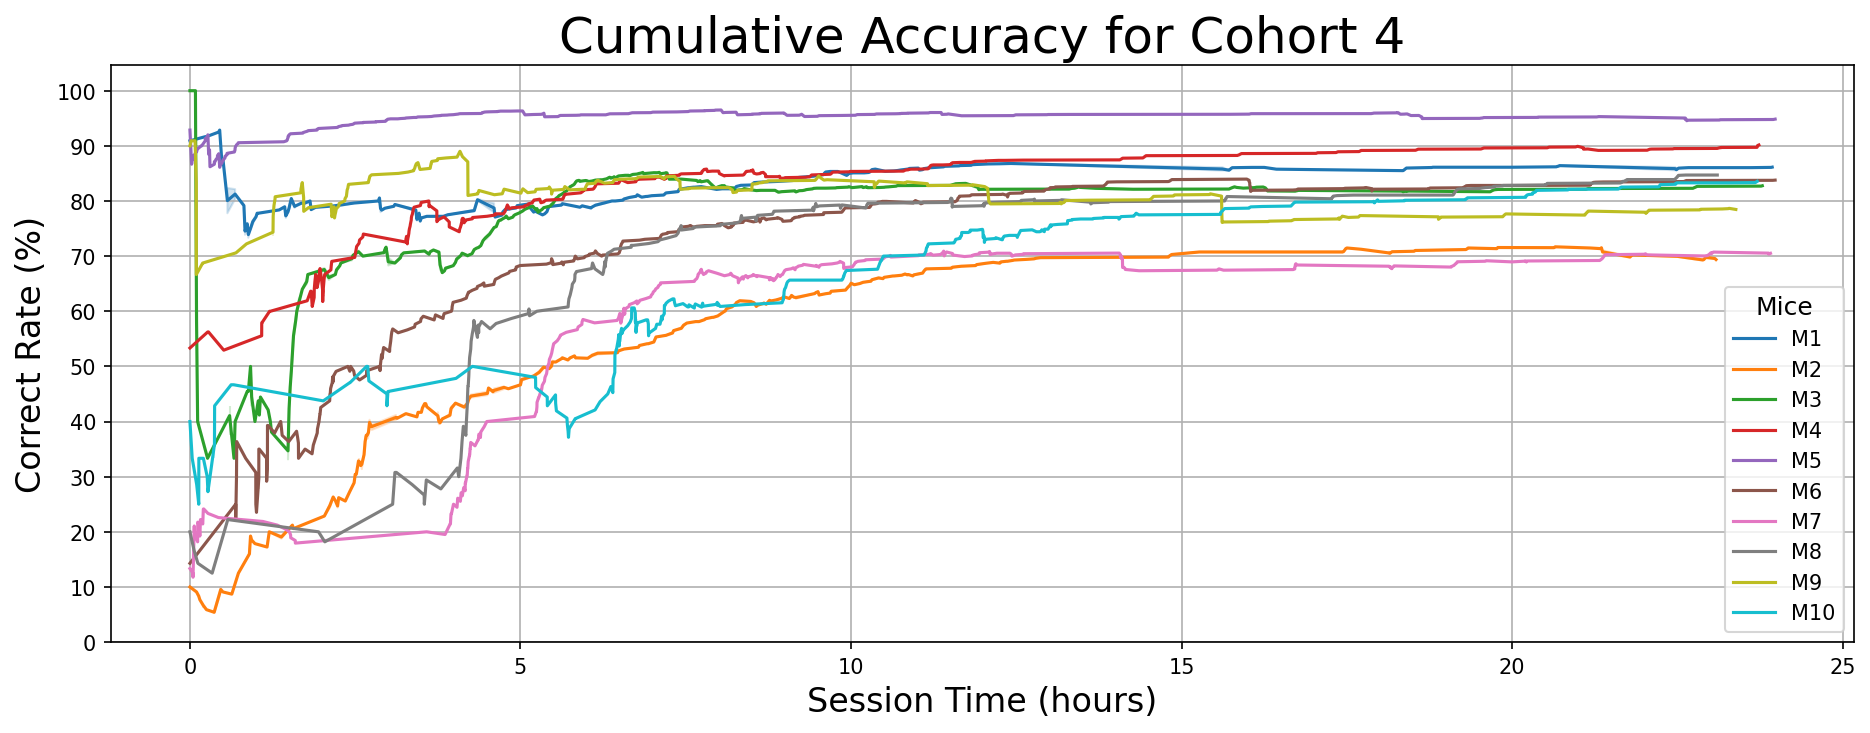

In [3]:
group_data = []

for idx, cohort in enumerate(fr1_cask_cohorts):
    for sheet in cohort:
        data = read_and_record(path=fr1_cask_path, sheet=sheet, 
                            ending_corr=cask_ending_corr, 
                            learned_time=cask_learned_time,
                            acc_dict=cask_acc_dict)
        group_data.append(data)
    graph_cumulative_acc(group_data, idx+1, export_path=os.path.join(export_root, f'cask_cohort_{idx+1}.svg'))
    group_data = []

### Analysis

#### Time need to reach 80% for 2 cont. hours

In [4]:
perform_T_test(ctrl_learned_time, cask_learned_time, test_side='two-sided')

P Value is  0.0054196329085916635
There is a significant difference between the two groups.


Ctrl Size: 35
CASK Size: 31
Ctrl Average: 4.216007936507936
CASK Average: 1.9930017921146952
Ctrl Standard Error: 0.6352258709831116
CASK Standard Error: 0.3720315626280228


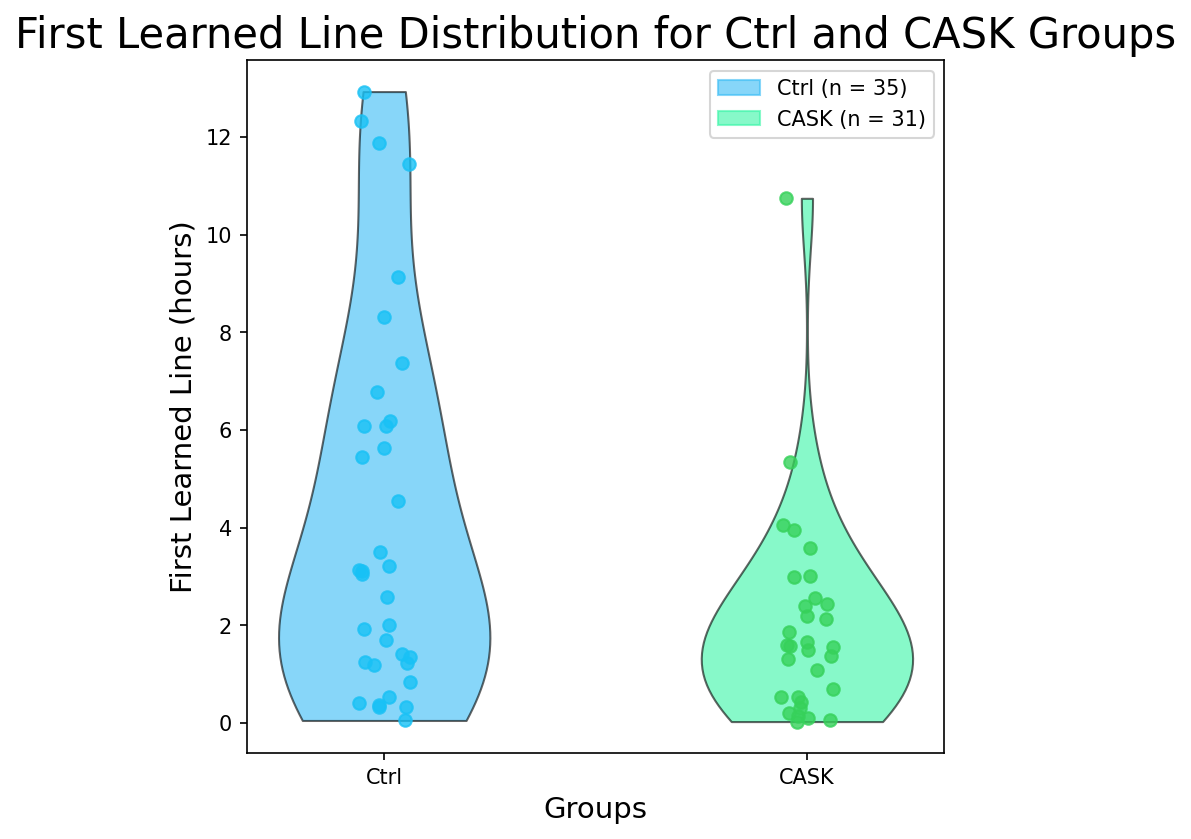

In [5]:
graph_group_stats(ctrl=ctrl_learned_time, exp=cask_learned_time, group_names=['Ctrl', 'CASK'], stats_name='First Learned Line', unit='hours',
                  export_path=os.path.join(export_root, '..', 'CASK_FR1_FirstLearnedLine_violinplot.svg')
                  )

In [6]:
import pickle
pickle.dump((ctrl_acc_dict, cask_acc_dict), open('../data/ctrl_fr1_acc.pkl', 'wb'))

#### Ctrl/Cask Ending/Overall Correct Rate

In [7]:
perform_T_test(ctrl_ending_corr, cask_ending_corr, test_side='two-sided')

P Value is  0.001223590547289425
There is a significant difference between the two groups.


Ctrl Size: 35
CASK Size: 31
Ctrl Average: 72.74410297106277
CASK Average: 81.25143023245667
Ctrl Standard Error: 1.7621967866139108
CASK Standard Error: 1.7206609754129158


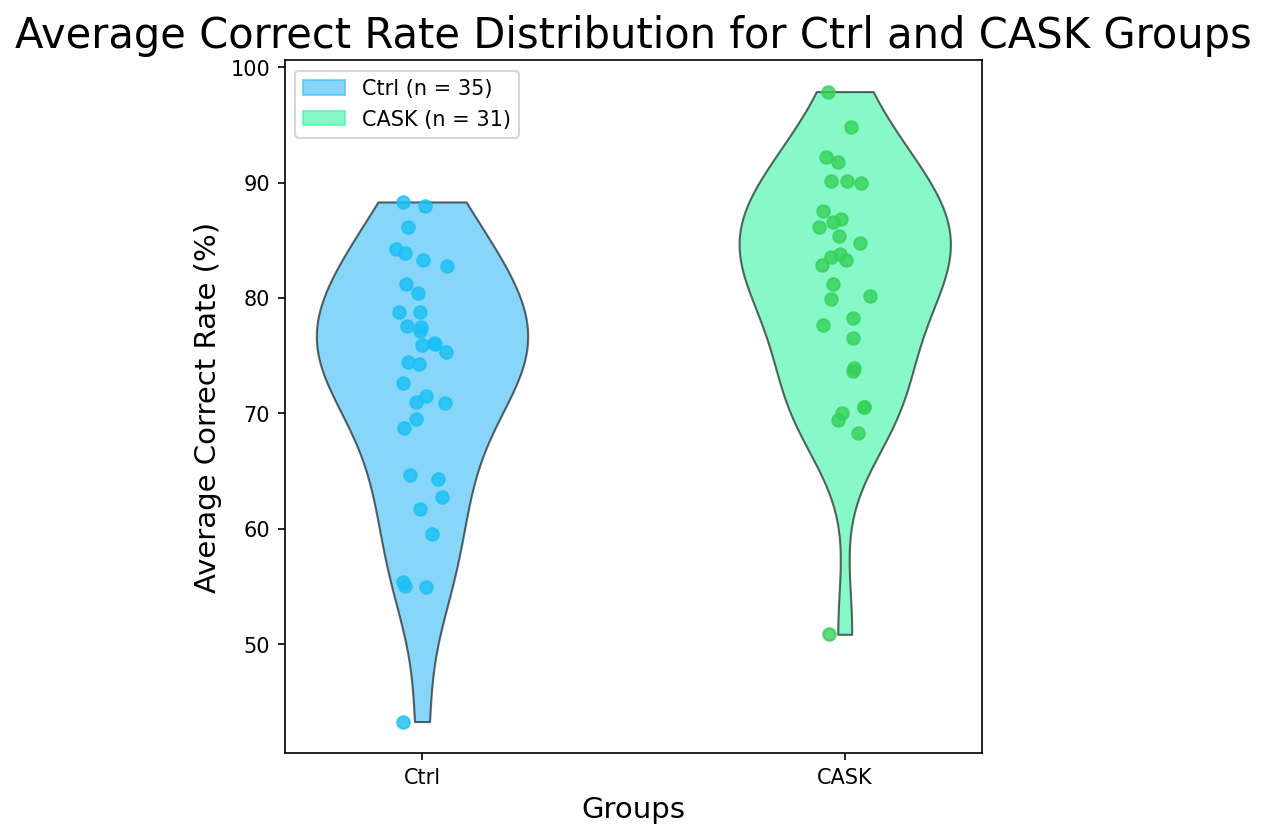

In [8]:
graph_group_stats(ctrl=ctrl_ending_corr, exp=cask_ending_corr, group_names=['Ctrl', 'CASK'], stats_name='Average Correct Rate', unit='%',
                  export_path=os.path.join(export_root, '..', 'CASK_FR1_accuracy_barplot.svg'))

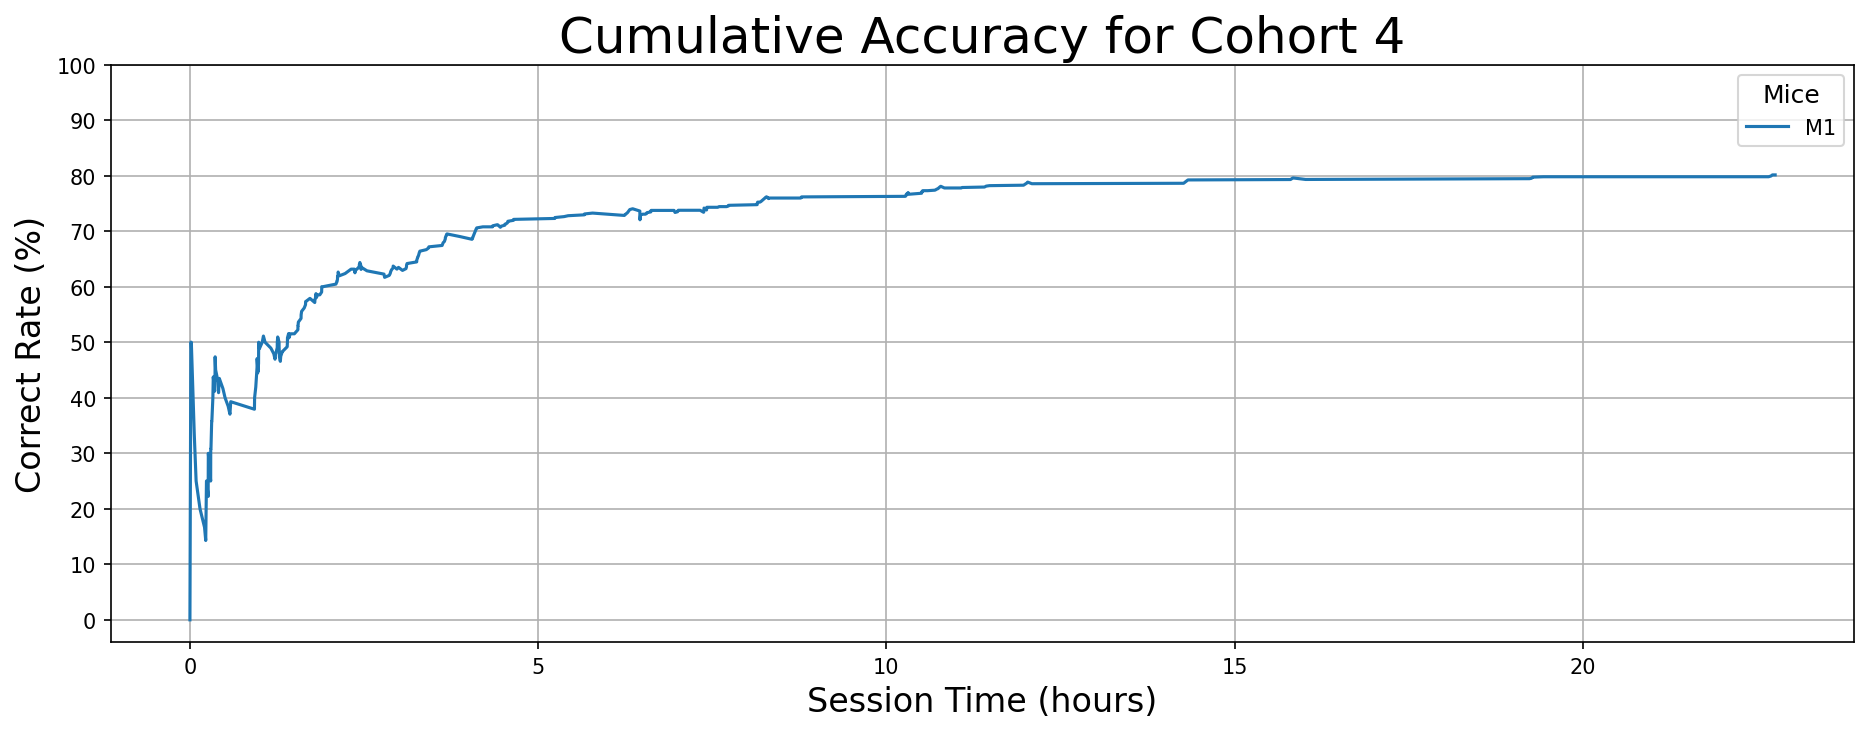

In [9]:
# example figure plotting
data = read_and_record(path=fr1_cask_path, sheet=fr1_cask_cohorts[0][3], 
                    ending_corr=cask_ending_corr, 
                    learned_time=cask_learned_time,
                    acc_dict=cask_acc_dict)
graph_cumulative_acc([data], idx+1, export_path=os.path.join(export_root, '..', f'accuracy_sample.svg'))